In [1]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from pca_model import pca_transform
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cancer_data = datasets.load_breast_cancer()
# show to test record 5th
# print(cancer_data.data[5])
# print(cancer_data.data.shape)
#target set
# print(cancer_data.target)
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state=109)

Explained Variance Ratio: [0.44007647 0.18975308]
Total Variance Explained by First Two Components: 0.6298295565487605


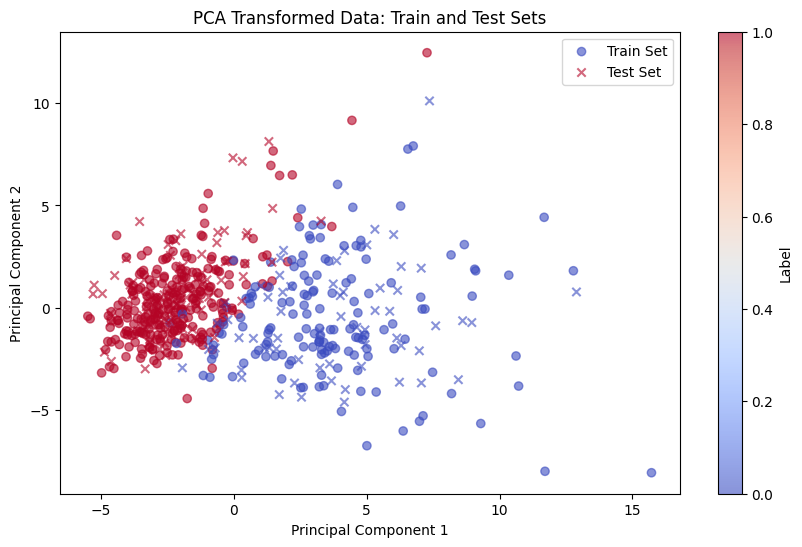

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

# Print explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained by First Two Components: {explained_variance.sum()}")

# Function to plot PCA transformed data
def plot_pca(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))

    # Plot the training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, label='Train', marker='o')

    # Plot the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, label='Test', marker='x')

    plt.title('PCA Transformed Data: Train and Test Sets')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(['Train Set', 'Test Set'])
    plt.colorbar(label='Label')

    plt.show()

# Plot the PCA-transformed data
plot_pca(X_train_transformed, y_train, X_test_transformed, y_test)

In [3]:
# Comparison: Logistic Regression vs. Perceptron

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Record the start time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Record the end time and calculate fit time
    fit_time = time.time() - start_time

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, conf_matrix, fit_time

# Initialize models
log_reg = LogisticRegression()
perceptron = Perceptron()

# Evaluate Logistic Regression
log_reg_metrics = evaluate_model(log_reg, X_train_transformed, y_train, X_test_transformed, y_test)

# Evaluate Perceptron
perceptron_metrics = evaluate_model(perceptron, X_train_transformed, y_train, X_test_transformed, y_test)

# Unpack metrics
log_reg_acc, log_reg_prec, log_reg_rec, log_reg_conf, log_reg_time = log_reg_metrics
perc_acc, perc_prec, perc_rec, perc_conf, perc_time = perceptron_metrics

# Print metrics
print("Logistic Regression - Confusion Matrix:\n", log_reg_conf)
print(f"Accuracy: {log_reg_acc:.4f}, Precision: {log_reg_prec:.4f}, Recall: {log_reg_rec:.4f}, Fit time: {log_reg_time:.4f}s")

print("\nPerceptron - Confusion Matrix:\n", perc_conf)
print(f"Accuracy: {perc_acc:.4f}, Precision: {perc_prec:.4f}, Recall: {perc_rec:.4f}, Fit time: {perc_time:.4f}s")

Logistic Regression - Confusion Matrix:
 [[ 58   5]
 [  1 107]]
Accuracy: 0.9649, Precision: 0.9554, Recall: 0.9907, Fit time: 0.0025s

Perceptron - Confusion Matrix:
 [[ 57   6]
 [  1 107]]
Accuracy: 0.9591, Precision: 0.9469, Recall: 0.9907, Fit time: 0.0010s


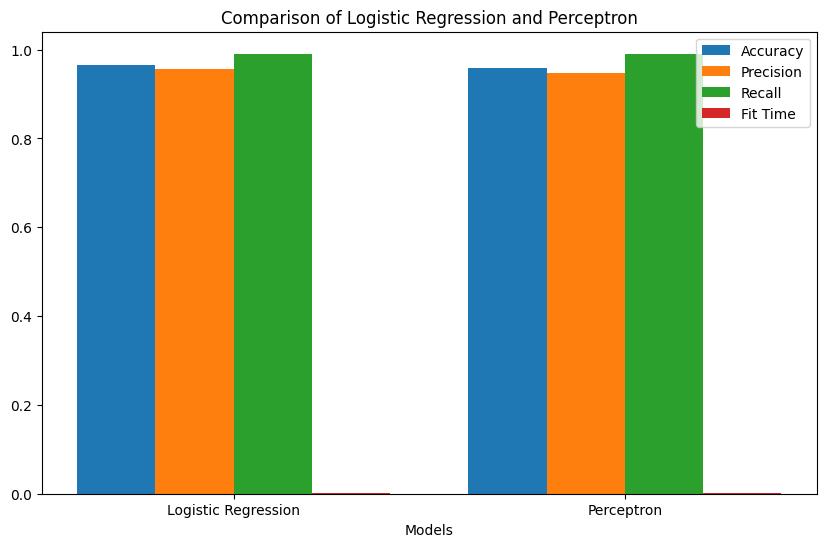

In [4]:
# Visualize comparison

# Data for bar plot
models = ['Logistic Regression', 'Perceptron']
accuracy = [log_reg_acc, perc_acc]
precision = [log_reg_prec, perc_prec]
recall = [log_reg_rec, perc_rec]
fit_time = [log_reg_time, perc_time]

# Plot settings
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
bar1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - width/2, precision, width, label='Precision')
bar3 = ax.bar(x + width/2, recall, width, label='Recall')
bar4 = ax.bar(x + width*1.5, fit_time, width, label='Fit Time')

# Add labels and title
ax.set_xlabel('Models')
ax.set_title('Comparison of Logistic Regression and Perceptron')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display plot
plt.show()